In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("C://Users//Karishma P//OneDrive//Desktop//case6-1.csv")
df.head()


,CustomerID,Age,Income (INR) (in lakhs per annum),Demography,Gender
0,CUS1,25,5,Rural,Female
1,CUS2,30,10,Urban,Male
2,CUS3,25,8,Rural,Female
3,CUS4,35,15,Rural,Female
4,CUS5,45,15,Urban,Male


In [7]:
df.shape

(8, 5)

In [8]:
df.info

<bound method DataFrame.info of   CustomerID  Age  Income (INR) (in lakhs per annum) Demography  Gender
0       CUS1   25                                  5      Rural  Female
1       CUS2   30                                 10      Urban    Male
2       CUS3   25                                  8      Rural  Female
3       CUS4   35                                 15      Rural  Female
4       CUS5   45                                 15      Urban    Male
5       CUS6   20                                  5      Urban    Male
6       CUS7   50                                 20      Urban    Male
7       CUS8   40                                 10      Urban  Female>

In [9]:
print(df.isna().sum())

CustomerID                           0
Age                                  0
Income (INR) (in lakhs per annum)    0
Demography                           0
Gender                               0
dtype: int64


In [41]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
df["age_sc"]=ss.fit_transform(df[['Age']])



In [42]:
df.head(2)

,CustomerID,Age,Income (INR) (in lakhs per annum),Demography,Gender,age_sc,Sex_Enc,Dem_Enc
0,CUS1,25,5,Rural,Female,-0.881917,1,0
1,CUS2,30,10,Urban,Male,-0.377964,0,1


In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Sex_Enc']=le.fit_transform(df['Gender'])
df['Dem_Enc']=le.fit_transform(df['Demography'])

In [17]:
df['Sex_Enc'] = df['Gender'].map({'Male':0, 'Female':1,}).astype(int)
df['Dem_Enc'] = df['Demography'].map({'Rural':0, 'Urban':1,}).astype(int)

In [46]:
df.head()

,CustomerID,Age,Income (INR) (in lakhs per annum),Demography,Gender,age_sc,Sex_Enc,Dem_Enc
0,CUS1,25,5,Rural,Female,-0.881917,1,0
1,CUS2,30,10,Urban,Male,-0.377964,0,1
2,CUS3,25,8,Rural,Female,-0.881917,1,0
3,CUS4,35,15,Rural,Female,0.125988,1,0
4,CUS5,45,15,Urban,Male,1.133893,0,1


In [47]:
df.columns = df.columns.str.strip() 

In [48]:
df.columns

Index(['CustomerID', 'Age', 'Income (INR) (in lakhs per annum)', 'Demography',
       'Gender', 'age_sc', 'Sex_Enc', 'Dem_Enc'],
      dtype='object')

In [52]:
from sklearn.datasets import make_blobs
raw_data = make_blobs(n_samples = 200, n_features = 2, centers = 4, cluster_std = 1.8)

In [53]:
raw_data

(array([[-3.39274756e+00, -4.56093846e+00],
        [-7.72912038e+00,  5.20203934e+00],
        [-6.65943334e+00,  5.56470829e+00],
        [-4.60149296e+00, -1.69530277e+00],
        [ 1.35185523e-01,  2.17005022e+00],
        [-1.97628189e-01, -2.05389149e-01],
        [-2.64755386e-01,  1.34696651e+00],
        [-8.65836149e+00, -3.12059792e+00],
        [-5.47687206e+00,  1.77770863e+00],
        [ 6.38525176e-01, -2.65792907e-01],
        [-3.41318409e+00, -2.82421999e+00],
        [ 2.28327919e+00, -5.08665916e-01],
        [-4.63078184e+00,  3.94459913e+00],
        [-2.28813266e+00,  6.30409500e+00],
        [-9.02415387e+00,  2.42739938e+00],
        [-8.06375396e-01, -8.76307387e-02],
        [-5.85345362e+00,  5.78545251e+00],
        [-3.52532156e+00, -2.10768639e+00],
        [ 8.76064895e-02, -1.19463851e+00],
        [ 1.87764292e+00,  1.48813985e+00],
        [-5.01388083e+00, -2.12366284e+00],
        [-3.26872467e+00, -1.74287298e+00],
        [-3.63822515e+00,  4.496

In [56]:
from sklearn.cluster import KMeans

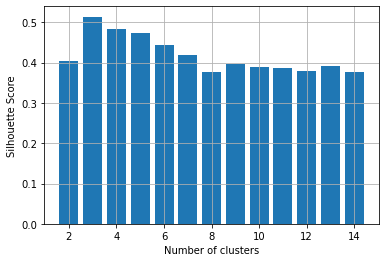

In [57]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2,15):
    silhouette_scores.append( 
        silhouette_score(raw_data[0], KMeans(n_clusters = n_cluster).fit_predict(raw_data[0]))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 


In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage


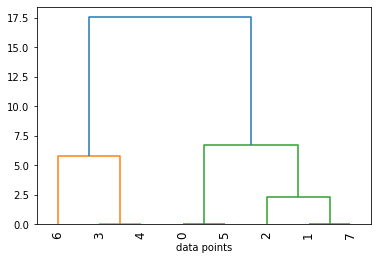

In [80]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

numeric_data = df[['Age']].to_numpy()
numeric_data = df[['Income (INR) (in lakhs per annum)']].to_numpy()


merg = linkage(numeric_data, method="ward")
dendrogram(merg, leaf_rotation=90)
plt.xlabel("data points")
plt.show()


In [71]:
model1 = KMeans(n_clusters=3) #now we have taken k=3
model1.fit(raw_data[0])

KMeans(n_clusters=3)

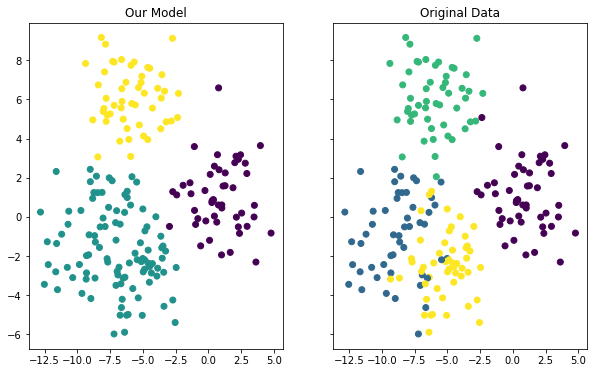

In [72]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.set_title('Our Model')

ax1.scatter(raw_data[0][:,0], raw_data[0][:,1],c=model1.labels_)

ax2.set_title('Original Data')

ax2.scatter(raw_data[0][:,0], raw_data[0][:,1],c=raw_data[1])
plt.show()